<a href="https://colab.research.google.com/github/swethag04/ml-projects/blob/main/linear-regression/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Comparing Feature Selection Methods
The objective of this analysis is to compare the results of Sequential feature selection and regularization. Sequential feature selection  sequentially adds or deletes features and only uses those that improve the model.  A regularized model  identifies features based on non-zero coefficients.   

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

The dataset has information on red wine chemical compositions and their quality. The goal is to use the properties of the wine to predict the quality.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df = pd.read_csv('sample_data/winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
X = df.drop('quality', axis = 1)
y = df['quality']

<Axes: >

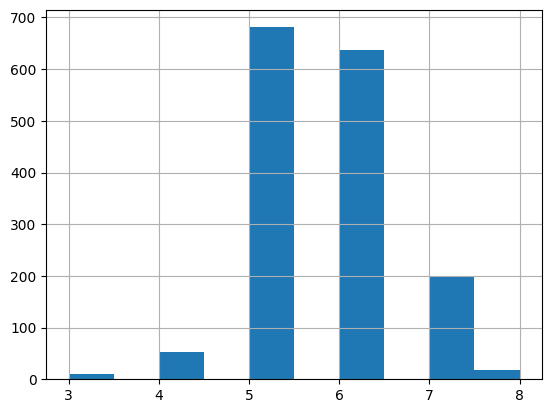

In [5]:
y.hist()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Ridge regression

In [7]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
print(f'Ridge mse: {ridge_mse}')

Ridge mse: 0.38881581038887325


In [8]:
ridge_coef = ridge.coef_
ridge_df = pd.DataFrame({'feature': X_train.columns, 'coef': ridge_coef})
print(ridge_df.sort_values(by= ['coef'], ascending=False))

                 feature      coef
9              sulphates  0.787379
10               alcohol  0.301850
0          fixed acidity  0.007815
5    free sulfur dioxide  0.005147
3         residual sugar  0.001828
6   total sulfur dioxide -0.003682
7                density -0.115520
2            citric acid -0.139799
8                     pH -0.415451
1       volatile acidity -1.022971
4              chlorides -1.690829


[Text(0.5, 1.0, 'Ridge regression coeffecients')]

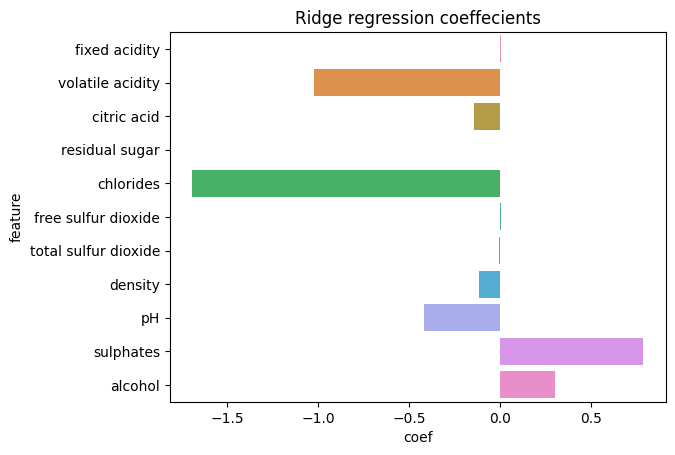

In [9]:
sns.barplot(ridge_df, y= 'feature', x='coef').set(title= 'Ridge regression coeffecients')

### Lasso Regression with 4 Features from Sequential Feature Selector (Lasso)



In [10]:
lasso = Lasso(alpha = 0.1)

sfs_selector = SequentialFeatureSelector(estimator = Lasso(),
                                         n_features_to_select = 4).fit(X_train, y_train)
sfs_selector_features = X_train.columns[sfs_selector.get_support()]
sfs_ridge = Ridge(alpha = 0.1).fit(X_train[sfs_selector_features], y_train)
sfs_ridge_mse = mean_squared_error(y_test, sfs_ridge.predict(X_test[sfs_selector_features]))
print(f'Sequential feature selector ridge MSE: {sfs_ridge_mse}')

Sequential feature selector ridge MSE: 0.5028019882429926


In [11]:
sfs_ridge_coefs = sfs_ridge.coef_
sfs_ridge_selected_features = X_train[sfs_selector_features].columns
sfs_ridge_df = pd.DataFrame({'feature': sfs_ridge_selected_features, 'coef': sfs_ridge_coefs})
print(sfs_ridge_df)

                feature      coef
0         fixed acidity -0.009273
1      volatile acidity -1.548390
2           citric acid  0.161124
3  total sulfur dioxide -0.004518


[Text(0.5, 1.0, 'Lasso regression coeffecients')]

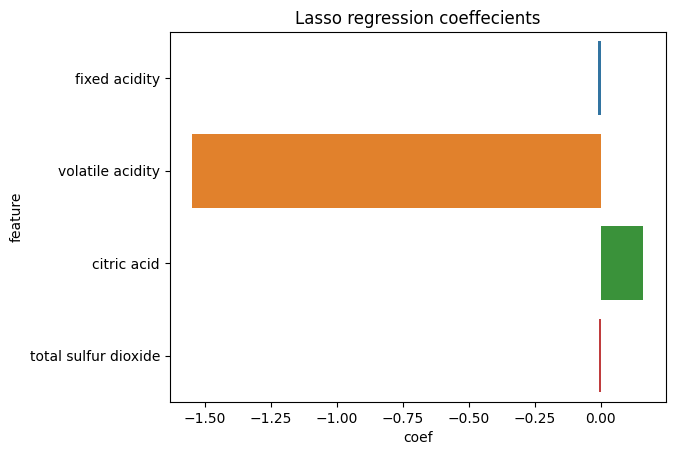

In [12]:
sns.barplot(sfs_ridge_df, y= 'feature', x='coef').set(title= 'Lasso regression coeffecients')

### Lasso regression with Recursive feature elimination

In [13]:
lasso = Lasso(alpha = 0.1)

rfe_selector = RFE(estimator = Lasso(),
                   n_features_to_select = 4).fit(X_train, y_train)
rfe_selector_features = X_train.columns[rfe_selector.get_support()]
rfe_ridge = Ridge(alpha = 0.1).fit(X_train[rfe_selector_features], y_train)

rfe_ridge_mse = mean_squared_error(y_test, rfe_ridge.predict(X_test[rfe_selector_features]))
print(f'Lasso with RFE MSE: ', rfe_ridge_mse )


Lasso with RFE MSE:  0.4407291526088393


In [14]:
rfe_ridge_coefs = rfe_ridge.coef_
rfe_ridge_selected_features = X_train[rfe_selector_features].columns
rfe_ridge_df = pd.DataFrame({'feature': rfe_ridge_selected_features, 'coef': rfe_ridge_coefs})
print(rfe_ridge_df)

                feature      coef
0  total sulfur dioxide -0.002896
1                    pH -0.533732
2             sulphates  0.800945
3               alcohol  0.355806


[Text(0.5, 1.0, 'Lasso regression with RFE coeffecients')]

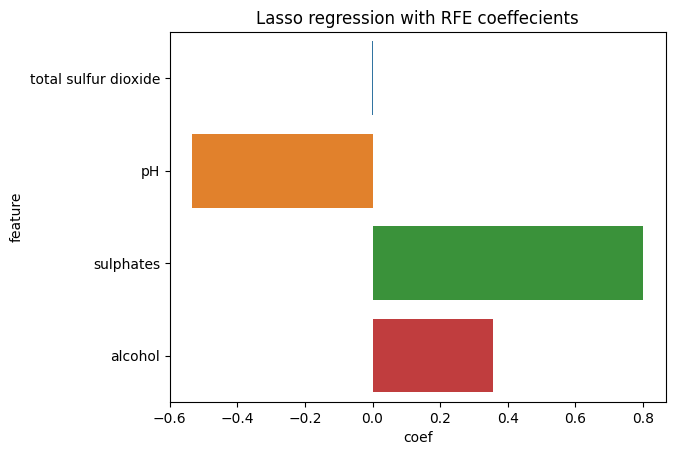

In [15]:
sns.barplot(rfe_ridge_df, y= 'feature', x='coef').set(title= 'Lasso regression with RFE coeffecients')